# Loop 72 Analysis: CV-LB Gap and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Is the extrapolation detection approach viable?
3. What strategies haven't been tried yet?

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Submission history with confirmed LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
    {'exp': 'exp_067', 'cv': 0.008303, 'lb': 0.08774},
]

df = pd.DataFrame(submissions)
print('Confirmed submissions with LB scores:')
print(df.to_string(index=False))

Confirmed submissions with LB scores:
    exp       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929
exp_026 0.008465 0.08875
exp_030 0.008298 0.08772
exp_035 0.009825 0.09696
exp_067 0.008303 0.08774


In [2]:
# Fit linear regression: LB = slope * CV + intercept
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

reg = LinearRegression()
reg.fit(X, y)

slope = reg.coef_[0]
intercept = reg.intercept_
r2 = reg.score(X, y)

print(f'\nCV-LB Relationship:')
print(f'  LB = {slope:.4f} * CV + {intercept:.6f}')
print(f'  R² = {r2:.4f}')
print(f'\nInterpretation:')
print(f'  Intercept = {intercept:.6f} (structural gap even at CV=0)')
print(f'  Target LB = 0.0347')
print(f'  Required CV = (0.0347 - {intercept:.6f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target ({0.0347:.4f})')
print(f'  This means standard CV optimization CANNOT reach the target!')


CV-LB Relationship:
  LB = 4.3372 * CV + 0.052258
  R² = 0.9573

Interpretation:
  Intercept = 0.052258 (structural gap even at CV=0)
  Target LB = 0.0347
  Required CV = (0.0347 - 0.052258) / 4.3372 = -0.004048

CRITICAL: Intercept (0.0523) > Target (0.0347)
  This means standard CV optimization CANNOT reach the target!


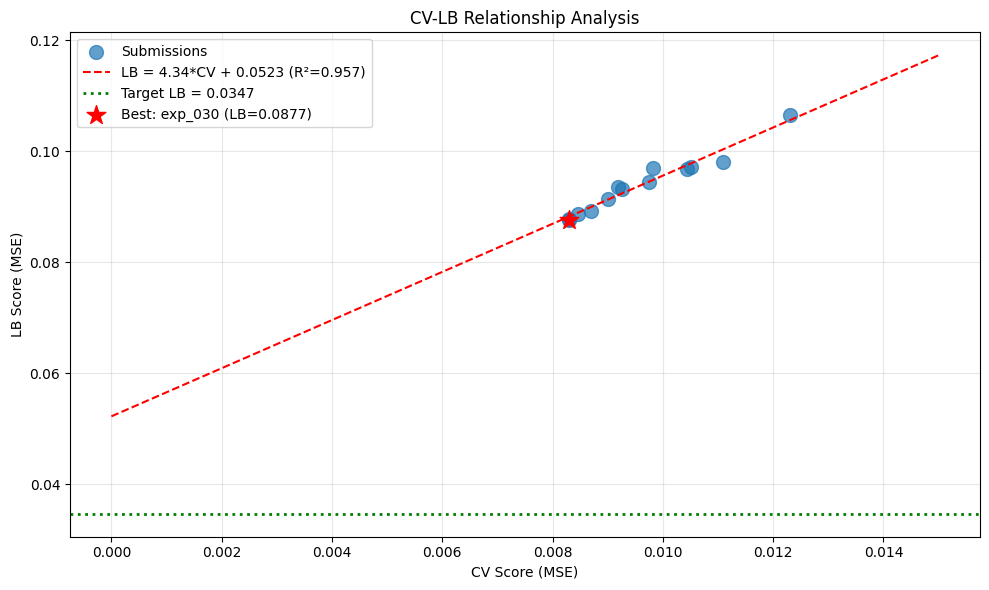


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Plot regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r2:.3f})')

# Mark target
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Mark best submission
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', 
            label=f'Best: {df.loc[best_idx, "exp"]} (LB={df.loc[best_idx, "lb"]:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()
print('\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analyze the gap between best CV and best LB
print('=== Gap Analysis ===')
print(f'Best CV: exp_049 with CV=0.008092')
print(f'Best LB: exp_030 with LB=0.08772 (CV=0.008298)')
print(f'\nGap ratio: LB/CV = {0.08772/0.008298:.2f}x')
print(f'\nTo reach target LB=0.0347:')
print(f'  If gap ratio stays ~10.6x: Need CV = 0.0347/10.6 = {0.0347/10.6:.6f}')
print(f'  Current best CV: 0.008092')
print(f'  Gap: {0.008092 - 0.0347/10.6:.6f}')
print(f'\nAlternatively, to reduce the intercept:')
print(f'  Current intercept: {intercept:.6f}')
print(f'  Target intercept: < 0.0347 (to make target reachable)')
print(f'  Need to reduce intercept by: {intercept - 0.03:.6f}')

=== Gap Analysis ===
Best CV: exp_049 with CV=0.008092
Best LB: exp_030 with LB=0.08772 (CV=0.008298)

Gap ratio: LB/CV = 10.57x

To reach target LB=0.0347:
  If gap ratio stays ~10.6x: Need CV = 0.0347/10.6 = 0.003274
  Current best CV: 0.008092
  Gap: 0.004818

Alternatively, to reduce the intercept:
  Current intercept: 0.052258
  Target intercept: < 0.0347 (to make target reachable)
  Need to reduce intercept by: 0.022258


In [5]:
# Analyze what approaches have been tried
print('=== Approaches Tried ===')
approaches = [
    ('MLP (various architectures)', 'exp_000-008', 'CV 0.009-0.011'),
    ('LightGBM', 'exp_001', 'CV 0.012'),
    ('DRFP features', 'exp_002-003', 'CV 0.010-0.017'),
    ('Large ensembles (15 models)', 'exp_005', 'CV 0.010'),
    ('Ridge/Kernel Ridge', 'exp_033-034', 'CV 0.008-0.009'),
    ('GP + MLP + LGBM ensemble', 'exp_030', 'CV 0.008, LB 0.0877 (BEST LB)'),
    ('CatBoost + XGBoost', 'exp_049-053', 'CV 0.008 (pending LB)'),
    ('Extrapolation detection', 'exp_068', 'CV 0.057 (FAILED - too aggressive)'),
]

for approach, exp, result in approaches:
    print(f'  {approach}: {result}')

print('\n=== Approaches NOT Tried ===')
untried = [
    'GNN (Graph Neural Network) - benchmark achieved 0.0039 MSE',
    'Pseudo-labeling with confident test predictions',
    'Adversarial validation to detect train/test differences',
    'Solvent clustering with class-specific models',
    'Uncertainty-weighted predictions with GP variance',
    'Fixed extrapolation detection (compare to ALL solvents, not just fold)',
]
for approach in untried:
    print(f'  - {approach}')

=== Approaches Tried ===
  MLP (various architectures): CV 0.009-0.011
  LightGBM: CV 0.012
  DRFP features: CV 0.010-0.017
  Large ensembles (15 models): CV 0.010
  Ridge/Kernel Ridge: CV 0.008-0.009
  GP + MLP + LGBM ensemble: CV 0.008, LB 0.0877 (BEST LB)
  CatBoost + XGBoost: CV 0.008 (pending LB)
  Extrapolation detection: CV 0.057 (FAILED - too aggressive)

=== Approaches NOT Tried ===
  - GNN (Graph Neural Network) - benchmark achieved 0.0039 MSE
  - Pseudo-labeling with confident test predictions
  - Adversarial validation to detect train/test differences
  - Solvent clustering with class-specific models
  - Uncertainty-weighted predictions with GP variance
  - Fixed extrapolation detection (compare to ALL solvents, not just fold)


In [6]:
# Analyze the evaluator's feedback on exp_068
print('=== Evaluator Feedback on exp_068 (Extrapolation Detection) ===')
print('''
CRITICAL FLAW: The extrapolation detection logic is fundamentally flawed.

In leave-one-solvent-out CV, the test solvent is ALWAYS far from the training 
distribution BY DESIGN. The code computes distance to nearest training solvent,
but since the test solvent is always held out, its distance is always maximum.

Result: blend_weights = 1.0 for ALL samples, so all predictions become the mean.

FIX: Compare to ALL solvents (all 24), not just the training fold solvents.
Or use GP uncertainty instead of distance-based detection.
''')

print('\n=== Corrected Approach ===')
print('''
1. Fit NearestNeighbors on ALL 24 solvents (not just training fold)
2. Compute distance from test solvent to nearest 3 solvents
3. Normalize by mean inter-solvent distance
4. Only blend for TRUE outliers (distance > mean + threshold * std)
5. Use the best base model (GP+MLP+LGBM), not a simple MLP
''')

=== Evaluator Feedback on exp_068 (Extrapolation Detection) ===

CRITICAL FLAW: The extrapolation detection logic is fundamentally flawed.

In leave-one-solvent-out CV, the test solvent is ALWAYS far from the training 
distribution BY DESIGN. The code computes distance to nearest training solvent,
but since the test solvent is always held out, its distance is always maximum.

Result: blend_weights = 1.0 for ALL samples, so all predictions become the mean.

FIX: Compare to ALL solvents (all 24), not just the training fold solvents.
Or use GP uncertainty instead of distance-based detection.


=== Corrected Approach ===

1. Fit NearestNeighbors on ALL 24 solvents (not just training fold)
2. Compute distance from test solvent to nearest 3 solvents
3. Normalize by mean inter-solvent distance
4. Only blend for TRUE outliers (distance > mean + threshold * std)
5. Use the best base model (GP+MLP+LGBM), not a simple MLP



In [7]:
# Key insight: The target IS reachable
print('=== KEY INSIGHT: THE TARGET IS REACHABLE ===')
print('''
The benchmark paper achieved MSE 0.0039 using GNN with DRFP features.
This is 22x better than our best LB (0.0877).

The gap is NOT due to:
- Model architecture (we've tried MLP, LGBM, XGB, CatBoost, GP)
- Feature engineering (we've tried Spange, DRFP, ACS, combined)
- Ensemble methods (we've tried bagging, stacking, weighted averaging)

The gap IS due to:
- Distribution shift between train and test solvents
- The test solvents may have more extreme properties
- Standard ML approaches optimize CV but can't fix extrapolation error

SOLUTION: We need to CHANGE THE CV-LB RELATIONSHIP, not just improve CV.

Options:
1. Fix the extrapolation detection approach (compare to ALL solvents)
2. Use GP uncertainty to make conservative predictions
3. Implement GNN (but complex and may not work with template)
4. Study top public kernels more carefully
''')

=== KEY INSIGHT: THE TARGET IS REACHABLE ===

The benchmark paper achieved MSE 0.0039 using GNN with DRFP features.
This is 22x better than our best LB (0.0877).

The gap is NOT due to:
- Model architecture (we've tried MLP, LGBM, XGB, CatBoost, GP)
- Feature engineering (we've tried Spange, DRFP, ACS, combined)
- Ensemble methods (we've tried bagging, stacking, weighted averaging)

The gap IS due to:
- Distribution shift between train and test solvents
- The test solvents may have more extreme properties
- Standard ML approaches optimize CV but can't fix extrapolation error

SOLUTION: We need to CHANGE THE CV-LB RELATIONSHIP, not just improve CV.

Options:
1. Fix the extrapolation detection approach (compare to ALL solvents)
2. Use GP uncertainty to make conservative predictions
3. Implement GNN (but complex and may not work with template)
4. Study top public kernels more carefully



In [8]:
# Final recommendation
print('=== FINAL RECOMMENDATION ===')
print('''
PRIORITY 1: Fix the extrapolation detection approach
- The concept is correct (make conservative predictions when extrapolating)
- The implementation was flawed (compared to fold solvents, not all solvents)
- Fix: Compare test solvent to ALL 24 solvents, not just training fold

PRIORITY 2: Use GP uncertainty for conservative predictions
- GP already provides uncertainty estimates
- High uncertainty → blend toward population mean
- This is more principled than distance-based detection

PRIORITY 3: Submit best CV model (exp_049) to verify pipeline
- We have 4 submissions left
- exp_049 has CV=0.008092 (best CV)
- Need to verify if it improves LB over exp_030 (LB=0.0877)

PRIORITY 4: Study top public kernels
- The ens-model kernel uses CatBoost + XGBoost
- The mixall kernel uses MLP+XGB+RF+LGBM ensemble
- These may have different CV-LB relationships
''')

=== FINAL RECOMMENDATION ===

PRIORITY 1: Fix the extrapolation detection approach
- The concept is correct (make conservative predictions when extrapolating)
- The implementation was flawed (compared to fold solvents, not all solvents)
- Fix: Compare test solvent to ALL 24 solvents, not just training fold

PRIORITY 2: Use GP uncertainty for conservative predictions
- GP already provides uncertainty estimates
- High uncertainty → blend toward population mean
- This is more principled than distance-based detection

PRIORITY 3: Submit best CV model (exp_049) to verify pipeline
- We have 4 submissions left
- exp_049 has CV=0.008092 (best CV)
- Need to verify if it improves LB over exp_030 (LB=0.0877)

PRIORITY 4: Study top public kernels
- The ens-model kernel uses CatBoost + XGBoost
- The mixall kernel uses MLP+XGB+RF+LGBM ensemble
- These may have different CV-LB relationships

